In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models,callbacks
from sklearn.model_selection import train_test_split
import joblib
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
import time



# Code to be executed





In [2]:
data=pd.read_csv("dataset.csv")
data

,I0,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,Angle
0,426,438,438,634,741,835,434,681,657,430,0,0,0,0,0,0
1,426,439,438,635,740,836,434,681,656,430,0,0,0,0,0,0
2,425,439,439,635,741,836,434,682,656,431,0,0,0,0,0,0
3,426,440,439,635,741,835,435,681,656,430,0,0,0,0,0,0
4,426,440,439,634,741,836,435,681,656,431,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
43196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
43197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
43198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [3]:
data.groupby('Angle').mean()

,I0,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14
Angle,,,,,,,,,,,,,,,
0,451.166042,459.205625,456.329792,671.017083,743.161458,829.324792,492.422708,659.779375,721.837708,400.153958,0.000000,0.000000,0.000000,0.000000,0.000000
1,459.885833,470.563542,466.002292,695.239583,744.773750,828.158958,488.176250,635.875208,684.872708,406.006250,0.000000,0.000000,0.000000,0.165000,0.000000
2,555.419167,589.612708,573.154375,655.508750,703.469792,774.707500,567.988333,603.161667,676.545208,534.079167,468.359375,487.808958,497.691458,567.642500,485.612917
3,539.887292,556.894583,540.171250,647.727917,662.282292,773.893958,539.035000,628.273958,706.625208,579.975208,558.922708,606.864167,427.077708,522.981875,418.555417
4,379.018542,428.844167,418.868958,431.331667,688.113333,874.303125,404.369375,487.543750,685.256875,237.163333,0.000000,0.000000,0.000000,0.000000,0.000000
5,470.558333,429.486042,420.752500,669.325833,690.098333,467.913333,429.350000,650.033750,561.838542,366.099583,56.939583,52.340417,50.750208,52.433333,52.290208
6,484.751875,580.552917,557.087083,586.641875,705.785000,850.243750,522.164583,549.313750,729.420208,514.188542,301.047083,543.896458,310.218750,423.716250,304.844375
7,558.354583,559.885625,538.232292,651.141458,671.543958,607.093958,498.511875,602.655417,570.560833,504.994583,290.311042,295.137917,374.077500,407.210000,298.313750
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
angles_to_set_zero = [0, 1, 4, 5]

# Set 'I9' to 0 for rows with matching 'Angle'
data.loc[data['Angle'].isin(angles_to_set_zero), 'I9'] = 0
columns_to_set_zero = ['I10', 'I11', 'I12', 'I13', 'I14']
data.loc[data['Angle'].isin([5]), columns_to_set_zero] = 0


In [5]:
data.groupby('Angle').mean()

,I0,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14
Angle,,,,,,,,,,,,,,,
0,451.166042,459.205625,456.329792,671.017083,743.161458,829.324792,492.422708,659.779375,721.837708,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,459.885833,470.563542,466.002292,695.239583,744.773750,828.158958,488.176250,635.875208,684.872708,0.000000,0.000000,0.000000,0.000000,0.165000,0.000000
2,555.419167,589.612708,573.154375,655.508750,703.469792,774.707500,567.988333,603.161667,676.545208,534.079167,468.359375,487.808958,497.691458,567.642500,485.612917
3,539.887292,556.894583,540.171250,647.727917,662.282292,773.893958,539.035000,628.273958,706.625208,579.975208,558.922708,606.864167,427.077708,522.981875,418.555417
4,379.018542,428.844167,418.868958,431.331667,688.113333,874.303125,404.369375,487.543750,685.256875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,470.558333,429.486042,420.752500,669.325833,690.098333,467.913333,429.350000,650.033750,561.838542,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,484.751875,580.552917,557.087083,586.641875,705.785000,850.243750,522.164583,549.313750,729.420208,514.188542,301.047083,543.896458,310.218750,423.716250,304.844375
7,558.354583,559.885625,538.232292,651.141458,671.543958,607.093958,498.511875,602.655417,570.560833,504.994583,290.311042,295.137917,374.077500,407.210000,298.313750
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
data.drop(columns=["Angle"],inplace=True)


In [7]:
num_samples=30
k=data.shape[0]//(num_samples)
mat=np.eye(9)
test=np.zeros(shape=(k))
for i in range(9):
  for j in range(k//9):
    test[(k//9)*i+j]=i


In [8]:
tr=np.array(data)
train=np.zeros(shape=(k,num_samples,15))
for i in range(k):
  tmp=np.zeros(shape=(num_samples,15))
  for j in range(num_samples):
    tmp[j]=tr[num_samples*i+j]
  train[i]=tmp
train=train/1024

In [9]:
test_size = 0.2
# test=test.reshape(-1,8,1)
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=test_size, random_state=42)
X_test.shape
y_test

array([1., 3., 3., 0., 3., 6., 8., 8., 7., 1., 3., 0., 7., 5., 0., 8., 4.,
       4., 1., 2., 7., 6., 7., 3., 5., 4., 4., 2., 0., 1., 5., 6., 6., 3.,
       3., 5., 0., 1., 7., 0., 1., 6., 2., 1., 4., 8., 0., 1., 8., 2., 6.,
       3., 8., 7., 4., 5., 2., 6., 6., 0., 3., 8., 8., 1., 8., 1., 7., 0.,
       5., 6., 4., 2., 4., 0., 1., 2., 7., 2., 3., 3., 2., 0., 3., 6., 7.,
       7., 1., 0., 0., 2., 1., 6., 6., 3., 2., 2., 2., 7., 6., 1., 4., 7.,
       4., 1., 5., 3., 8., 2., 8., 4., 2., 5., 2., 2., 5., 5., 7., 4., 5.,
       6., 1., 1., 5., 0., 6., 3., 7., 3., 0., 4., 5., 6., 3., 4., 1., 3.,
       8., 1., 8., 8., 3., 4., 4., 1., 0., 3., 2., 4., 5., 5., 1., 5., 7.,
       3., 4., 3., 5., 1., 3., 1., 6., 1., 4., 3., 6., 0., 3., 1., 1., 4.,
       4., 5., 6., 5., 5., 8., 0., 0., 8., 5., 5., 2., 5., 3., 4., 4., 6.,
       2., 3., 6., 4., 0., 3., 6., 2., 3., 7., 8., 8., 7., 3., 6., 5., 8.,
       7., 8., 4., 8., 5., 4., 3., 5., 8., 8., 6., 2., 1., 7., 1., 0., 5.,
       5., 2., 5., 0., 0.

In [10]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(num_samples, 15, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_callback = callbacks.ModelCheckpoint('best_weights.h5',
                                                 monitor='val_accuracy',
                                                 save_best_only=True,
                                                 save_weights_only=True,
                                                 mode='max',
                                                 verbose=1)

history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint_callback])
model.load_weights('best_weights.h5')


Epoch 1/50
31/36 [========================>.....] - ETA: 0s - loss: 2.0253 - accuracy: 0.2077
Epoch 1: val_accuracy improved from -inf to 0.30556, saving model to best_weights.h5
36/36 [==============================] - 0s 6ms/step - loss: 2.0092 - accuracy: 0.2222 - val_loss: 1.8329 - val_accuracy: 0.3056
Epoch 2/50
30/36 [========================>.....] - ETA: 0s - loss: 1.7772 - accuracy: 0.3177
Epoch 2: val_accuracy improved from 0.30556 to 0.39236, saving model to best_weights.h5
36/36 [==============================] - 0s 4ms/step - loss: 1.7785 - accuracy: 0.3108 - val_loss: 1.6686 - val_accuracy: 0.3924
Epoch 3/50
32/36 [=========================>....] - ETA: 0s - loss: 1.6031 - accuracy: 0.3770
Epoch 3: val_accuracy improved from 0.39236 to 0.41319, saving model to best_weights.h5
36/36 [==============================] - 0s 4ms/step - loss: 1.5855 - accuracy: 0.3854 - val_loss: 1.5118 - val_accuracy: 0.4132
Epoch 4/50
28/36 [======================>.......] - ETA: 0s - loss: 1.

36/36 [==============================] - 0s 5ms/step - loss: 0.2108 - accuracy: 0.9314 - val_loss: 0.2296 - val_accuracy: 0.9236
Epoch 29/50
27/36 [=====================>........] - ETA: 0s - loss: 0.2005 - accuracy: 0.9329
Epoch 29: val_accuracy improved from 0.92361 to 0.96181, saving model to best_weights.h5
36/36 [==============================] - 0s 5ms/step - loss: 0.2344 - accuracy: 0.9201 - val_loss: 0.1849 - val_accuracy: 0.9618
Epoch 30/50
28/36 [======================>.......] - ETA: 0s - loss: 0.1748 - accuracy: 0.9464
Epoch 30: val_accuracy did not improve from 0.96181
36/36 [==============================] - 0s 4ms/step - loss: 0.1775 - accuracy: 0.9462 - val_loss: 0.2523 - val_accuracy: 0.9097
Epoch 31/50
27/36 [=====================>........] - ETA: 0s - loss: 0.1949 - accuracy: 0.9398
Epoch 31: val_accuracy did not improve from 0.96181
36/36 [==============================] - 0s 4ms/step - loss: 0.1874 - accuracy: 0.9453 - val_loss: 0.2934 - val_accuracy: 0.9097
Epoch 

9/9 [==============================] - 0s 2ms/step - loss: 0.1226 - accuracy: 0.9757
Test Accuracy: 0.9756944179534912
Execution time: 0.04198598861694336 seconds


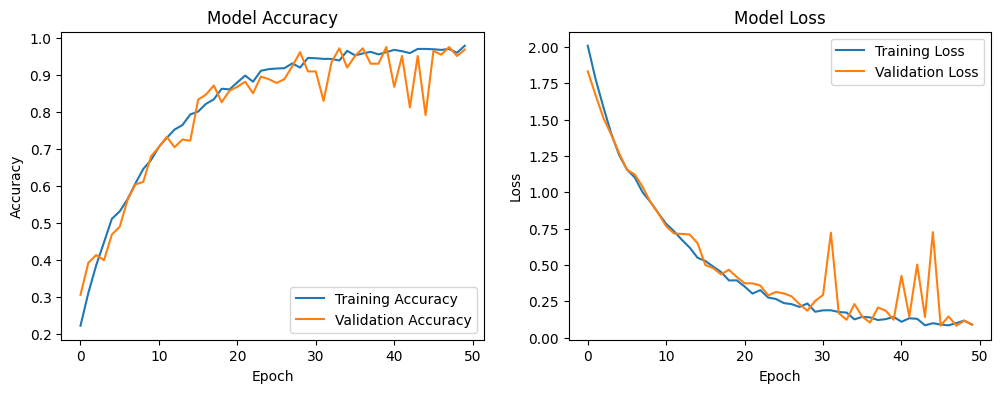

In [11]:
start_time = time.time()
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()
end_time = time.time()


In [12]:
model.save('my_model.h5')

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
model.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

ValueError: in user code:

    File "/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/opt/homebrew/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 30, 15, 1), found shape=(None, 15)


In [ ]:
X_train=X_train.reshape(-1,num_samples*15)
X_test=X_test.reshape(-1,num_samples*15)
model2 = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(num_samples*15,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(9, activation='softmax')
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_callback = callbacks.ModelCheckpoint('best_weights2.h5',
                                                 monitor='val_accuracy',
                                                 save_best_only=True,
                                                 save_weights_only=True,
                                                 mode='max',
                                                 verbose=1)

history2 = model2.fit(X_train, y_train, epochs=40, batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint_callback])
model2.load_weights('best_weights2.h5')
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

